# Home assignment 1: Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kalman_filter(x, E):
    """Apply Kalman filter to sequence

    Args:
        x: initial state space configuration (location and velocity)
        E: initial covariance matrix
    """
    k_log = []
    x_log = [np.matrix(x)]

    for measurement in measurements:
        # prediction
        x = (F @ x) + u
        #print('x=',x)
        E = F @ E @ F.T
        #print('E=',E)

        # measurement update
        Z = np.array([measurement])
        #print('Z=',Z)
        S = H @ E @ H.T + R
        #print('S=',S)
        K = E @ H.T @ np.linalg.inv(S)
        k_log.append(K)
        x = x + (K @ (Z.T - (H @ x)))
        E = (I - (K @ H)) @ E

        x_log.append(x)
        #print(f"x= \n{x}")
        #print(f"E= \n{E}")

    return k_log, x_log

You could edit `kalman_filter` function if you need more info about the process e.g. `x` values over time and so on

_Hint:_ to define matrices below function [np.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) is very handy

In [3]:
dt = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.matrix([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 1000, 0],
              [0, 0, 0, 1000]])

# next state function: 4D
F = np.matrix([[1, 0, dt, 0],
              [0, 1, 0, dt],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

# measurement function: reflect the fact that we observe x and y but not the two velocities
H = np.matrix([[1, 0, 0, 0],
               [0, 1, 0, 0]])

# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = np.matrix([[0.1, 0],
              [0, 0.1]])

# 4D identity matrix
I = np.matrix([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

## First experiment

In [4]:
measurements = [[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]]
initial_xy = [4.0, 12.0]


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [5]:
k_s, x_s = kalman_filter(x, E)

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

_(It's a good idea to write a function for this, so you could reuse it in the next experiment)_

In [6]:
def draw_graphic_x_y_v(x_s):
  x_o = [dt * i for i in range(len(x_s))]
  y1 = [float(x_s[i][0][0]) for i in range(len(x_s))]
  y2 = [float(x_s[i][1][0]) for i in range(len(x_s))]
  y3 = [float(x_s[i][2][0]) for i in range(len(x_s))]
  y4 = [float(x_s[i][3][0]) for i in range(len(x_s))]
  plt.figure(figsize=(12, 7))
  plt.plot(x_o, y1, c='r', label="x")
  plt.plot(x_o, y2, c='g', label="y")
  plt.plot(x_o, y3, c='b', label="V_x")
  plt.plot(x_o, y4, c='y', label="V_y")
  plt.legend()
  plt.grid(True)

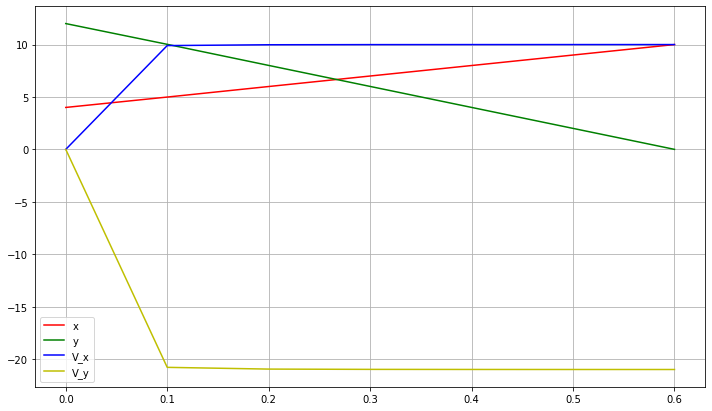

In [7]:
# YOUR CODE HERE
draw_graphic_x_y_v(x_s)

Visualize the components of the $ K $ matrix below

In [8]:
def drow_k(k_s): #рисовал только ненулевые, там их 4 всего
  x_o = [dt * (i+1) for i in range(len(k_s))]
  y1 = [float(k_s[i].take(0)) for i in range(len(k_s))]
  y2 = [float(k_s[i].take(3)) for i in range(len(k_s))]
  y3 = [float(k_s[i].take(4)) for i in range(len(k_s))]
  y4 = [float(k_s[i].take(3)) for i in range(len(k_s))]
  plt.figure(figsize=(12, 7))
  plt.plot(x_o, y1, c='r', label="k_1_1")
  plt.legend()
  plt.grid(True)
  plt.show()
  plt.close()
  plt.plot(x_o, y2, c='g', label="k_2_2")
  plt.legend()
  plt.grid(True)
  plt.show()
  plt.close()
  plt.plot(x_o, y3, c='b', label="k_3_1")
  plt.legend()
  plt.grid(True)
  plt.show()
  plt.close()
  plt.plot(x_o, y4, c='y', label="k_4_2")
  plt.legend()
  plt.grid(True)
  plt.show()
  plt.close()


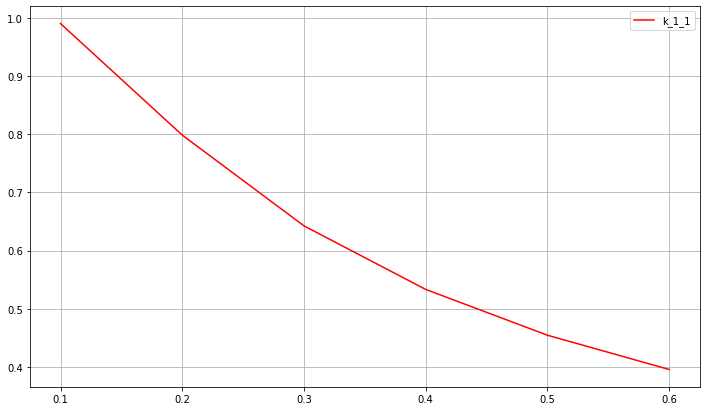

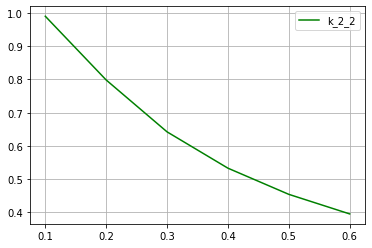

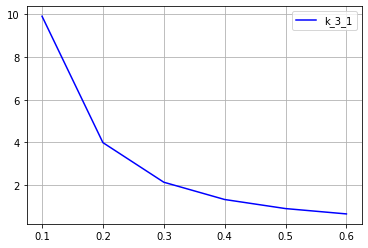

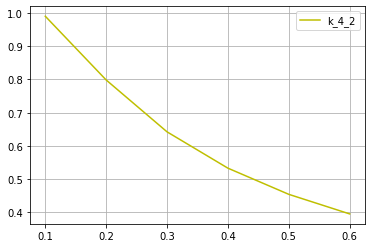

In [9]:
# YOUR CODE HERE
drow_k(k_s)

## Second experiment

In [10]:
measurements = [[1.0, 4.0], [6.0, 0.0], [11.0, -4.0], [16.0, -8.0]]
initial_xy = [-4.0, 8.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [11]:
k_s, x_s = kalman_filter(x, E)

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

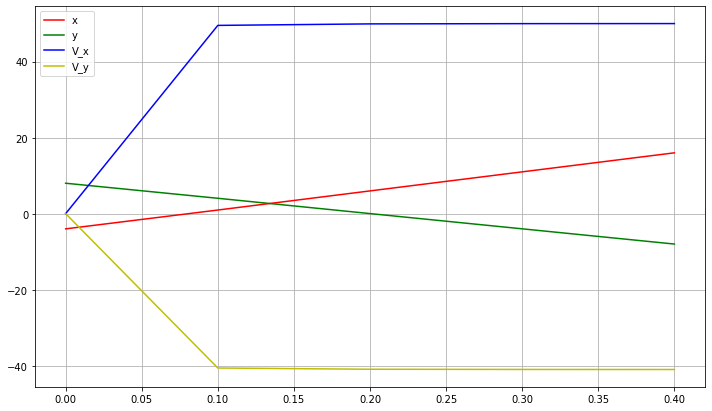

In [12]:
# YOUR CODE HERE
draw_graphic_x_y_v(x_s)

Visualize the components of the $ K $ matrix below

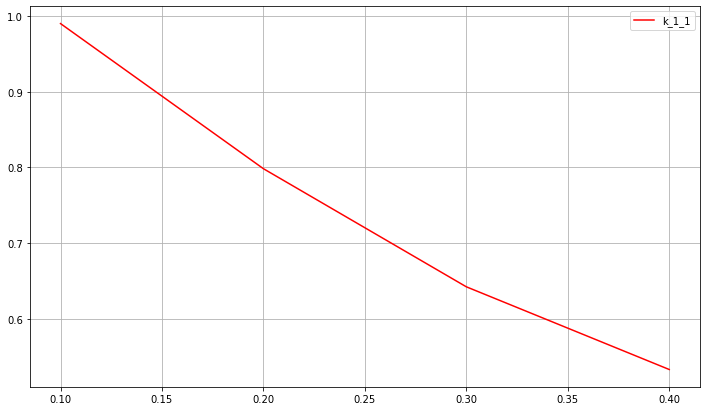

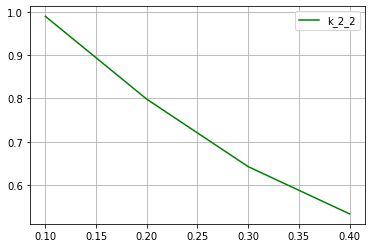

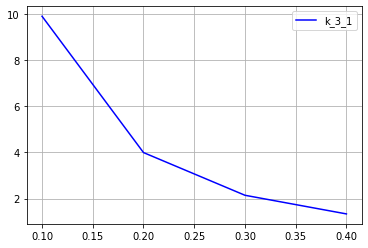

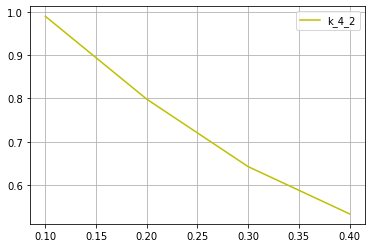

In [13]:
# YOUR CODE HERE
drow_k(k_s)

## Third Experiment

In [14]:
measurements = [[1.0, 17.0], [1.0, 15.0], [1.0, 13.0], [1.0, 11.0]]
initial_xy = [1.0, 19.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [15]:
k_s, x_s = kalman_filter(x, E)

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

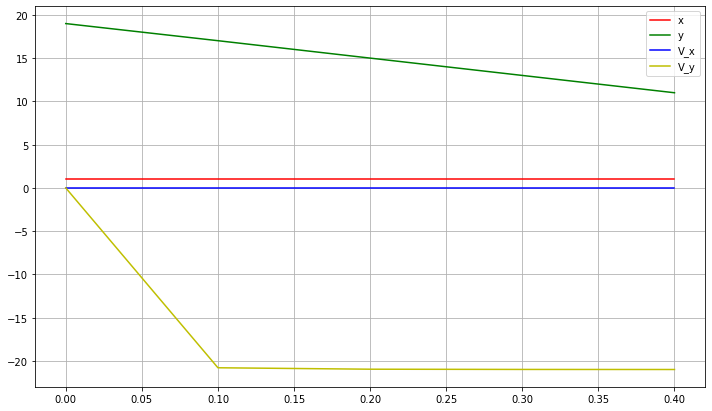

In [16]:
# YOUR CODE HERE
draw_graphic_x_y_v(x_s)

Visualize the components of the $ K $ matrix below

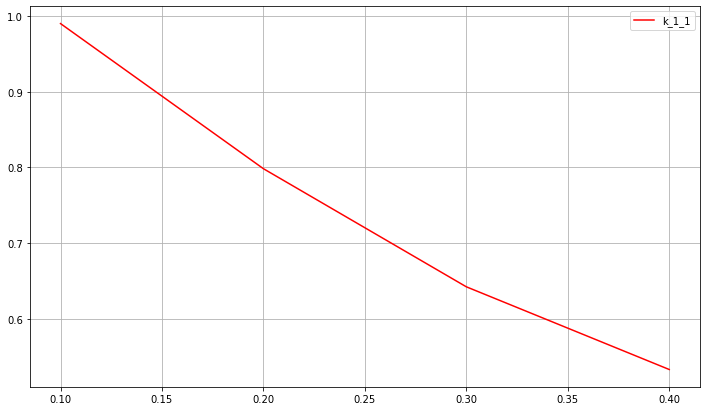

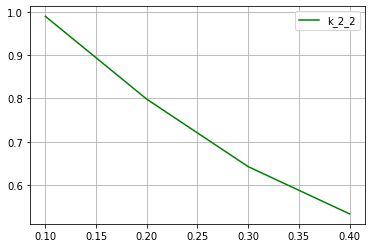

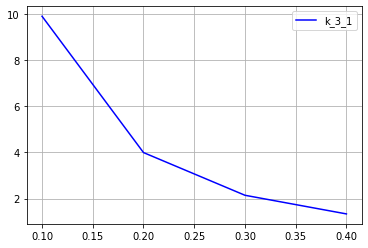

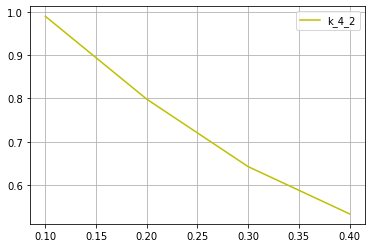

In [17]:
# YOUR CODE HERE
drow_k(k_s)

## Conclusions

Don't forget to put your thoughts on the experiments above.

Questions to stimulate thoughts could be found in the beginning of the notebook =)

4 элемента матрицы равны 0 и 4 элемента убывают по экспоненте. Если грубо говорить, то сначала мы больше доверяем измерениям, а затем все меньше.

Неопределенность скорости экспоненциально уменьшается на каждом шаге во всех трех экспериментах.